# PyTao Basics

## Inititialize Tao

`Tao` is the basic object. Anything used to initialize Tao on the command line can be used to initialize a Tao object

In [1]:
from pytao import Tao

In [2]:
tao = Tao("-init $ACC_ROOT_DIR/bmad-doc/tao_examples/cesr/tao.init -noplot")

## Send a command

Anything that you would normally type at a Tao> prompt can be sent as a string. The return is a list of output strings. To send a command:

In [3]:
tao.cmd("show lat 1:10")

['# Values shown are for the Downstream End of each Element (Girder at ref point):',
 '# Index  name          key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                                a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      1  IP_L0         Marker                0.000   0.000    0.95   0.000  -0.00  -0.017    0.02   0.000   0.00   0.001  Alive',
 '      2  CLEO_SOL#3    Solenoid              0.622   0.622    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041  Alive',
 '      3  DET_00W       Marker                0.622   0.000    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041  Alive',
 '      4  CLEO_SOL#4    Solenoid              0.638   0.016    1.36   0.094  -0.02   1.507   22.92   0.244   0.00   0.043  Alive',
 '      5  Q00W\\CLEO_SOL Sol_Quad              1.755   1.117    7.73   0.160  -0.09   5.505   88.01   0.247  -0.01   0.486

Send a list of commands. This returns the corresponding list of outputs:

In [4]:
tao.cmds(["set lattice model=design", "set ele Q00W x_offset = 1e-6"])

[[], []]

## Jupyter magic %%tao

This is an alternative way to send commands to Tao directly in the jupyter notebook, using the %%tao magic. Multiple lines can be executed.

In [5]:
%%tao
sho lat 1:10
sho ele 4

-------------------------
Tao> sho lat 1:10
# Values shown are for the Downstream End of each Element (Girder at ref point):
# Index  name          key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track
#                                                                a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State
      1  IP_L0         Marker                0.000   0.000    0.95   0.000  -0.00  -0.018    0.02   0.000   0.00   0.001  Alive
      2  CLEO_SOL#3    Solenoid              0.622   0.622    1.34   0.093  -0.02   1.469   21.81   0.244   0.00   0.042  Alive
      3  DET_00W       Marker                0.622   0.000    1.34   0.093  -0.02   1.469   21.81   0.244   0.00   0.042  Alive
      4  CLEO_SOL#4    Solenoid              0.638   0.016    1.36   0.094  -0.02   1.507   22.92   0.244   0.00   0.044  Alive
      5  Q00W\CLEO_SOL Sol_Quad              1.755   1.117    7.73   0.160  -0.09   5.505   88.01   0.247  

## Interface commands

Output above from the `show` command is designed to be human-readable. In general you should **not** try to parse these strings for data. For data, Tao has a special set of commands to send back data suitable for parsing in Python (or other software). 

Below are the raw commands. 

In [6]:
%%tao
help python

-------------------------
Tao> help python
"Python" is the old name for the "pipe" command. For backwards compatibility,
the old name is still accepted.

-------------------------
Tao> 


This data is returned as specially formatted lists

In [7]:
tao.cmd("python orbit_at_s end")

['x;REAL;F; -1.77207910292979E-05',
 'px;REAL;F;  2.39054798135120E-03',
 'y;REAL;F;  9.77805901537352E-07',
 'py;REAL;F;  2.91412237467723E-06',
 'z;REAL;F; -3.99530687474893E-04',
 'pz;REAL;F; -7.17210139012370E-06',
 'spin;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00;  0.00000000000000E+00',
 'field;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00',
 'phase;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00',
 's;REAL;F;  7.68426421416168E+02',
 't;REAL;F;  2.56319600136698E-06',
 'charge;REAL;F;  0.00000000000000E+00',
 'dt_ref;REAL;F;  0.00000000000000E+00',
 'p0c;REAL;F;  5.28899997531481E+09',
 'beta;REAL;F;  9.99999995332663E-01',
 'ix_ele;INT;F;868',
 'state;STR;F;Alive',
 'direction;INT;F;1',
 'species;SPECIES;F;Electron',
 'location;STR;F;Downstream_End']

Some commands have 'array_out' options. For example, this seems to return nothing:

In [8]:
tao.cmd("python lat_list -array_out 1@0>>Q*|model orbit.floor.x")

[]

But calling `.cmd_real` on the same command will get the data from an internal pointer:

In [9]:
tao.cmd_real("python lat_list -array_out 1@0>>Q*|model orbit.floor.x")

array([ 0.00000000e+00,  5.50519227e-03,  8.15061849e-03,  1.68506712e-02,
        1.30498232e-02, -1.28475438e-01, -6.17368437e-01, -1.63573126e+00,
       -3.15361609e+00, -4.96008216e+00, -8.44394576e+00, -1.25353213e+01,
       -1.53643077e+01, -1.93160719e+01, -2.35334256e+01, -2.86596035e+01,
       -3.40012341e+01, -4.11157702e+01, -4.73379418e+01, -5.39309791e+01,
       -6.08761235e+01, -6.66395259e+01, -7.38887343e+01, -8.14004767e+01,
       -8.91380421e+01, -9.70602503e+01, -1.07067453e+02, -1.15219118e+02,
       -1.23415239e+02, -1.31835984e+02, -1.39984608e+02, -1.48267474e+02,
       -1.57243533e+02, -1.65204340e+02, -1.72728163e+02, -1.80184446e+02,
       -1.85357654e+02, -1.92035945e+02, -2.00803297e+02, -2.06870811e+02,
       -2.12665465e+02, -2.18176442e+02, -2.23048894e+02, -2.27424214e+02,
       -2.31268351e+02, -2.34552350e+02, -2.35722776e+02, -2.38140768e+02,
       -2.39786174e+02, -2.41460795e+02, -2.42244506e+02, -2.42601932e+02,
       -2.42642705e+02, -

# Tao method commands

For convenience, all of these commands are available as methods of the Tao class, and automatically parse the output.

For example, to get the orbit at an `s` position:

In [10]:
tao.orbit_at_s(s_offset=1.2)

{'x': 0.0031086901274775,
 'px': 0.00344600568175248,
 'y': 0.000183189785853986,
 'py': 0.000248941211793991,
 'z': -0.000403681671684383,
 'pz': -7.17210138887265e-06,
 'spin': array([0., 0., 0.]),
 'field': array([0., 0.]),
 'phase': array([0., 0.]),
 's': 1.2,
 't': 4.00411569818175e-09,
 'charge': 0.0,
 'dt_ref': 0.0,
 'p0c': 5288999975.31481,
 'beta': 0.999999995332663,
 'ix_ele': 5,
 'state': 'Alive',
 'direction': 1,
 'species': 'Electron',
 'location': 'Inside'}

Some commands return arrays:

In [11]:
tao.evaluate("data::cbar.11[1:10]|model")

array([ 2.81123075e-03, -1.06250116e-03,  1.37663906e-04,  3.08061464e-04,
       -3.66558772e-04, -3.42869819e-04, -9.92517178e-06,  1.28279238e-03,
        2.66250141e-03,  2.68364369e-03])

## lat_list

`lat_list` can be used to efficiently extract array data. By default this returns an array of floats:

In [12]:
s = tao.lat_list("*", "ele.s", verbose=True)
s[0:5]

pipe lat_list -array_out -track_only @>>*|model ele.s


array([0.      , 0.      , 0.622301, 0.622301, 0.637956])

These particulars keys will return integers:

In [13]:
state = tao.lat_list("*", "orbit.state")
ix = tao.lat_list("*", "ele.ix_ele")
state.dtype, ix.dtype

(dtype('<i4'), dtype('<i4'))

And this one will return a list of strings:

In [14]:
names = tao.lat_list("*", "ele.name")
names[0:5]

['BEGINNING', 'IP_L0', 'CLEO_SOL#3', 'DET_00W', 'CLEO_SOL#4']

In [15]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

Simple plot of this data

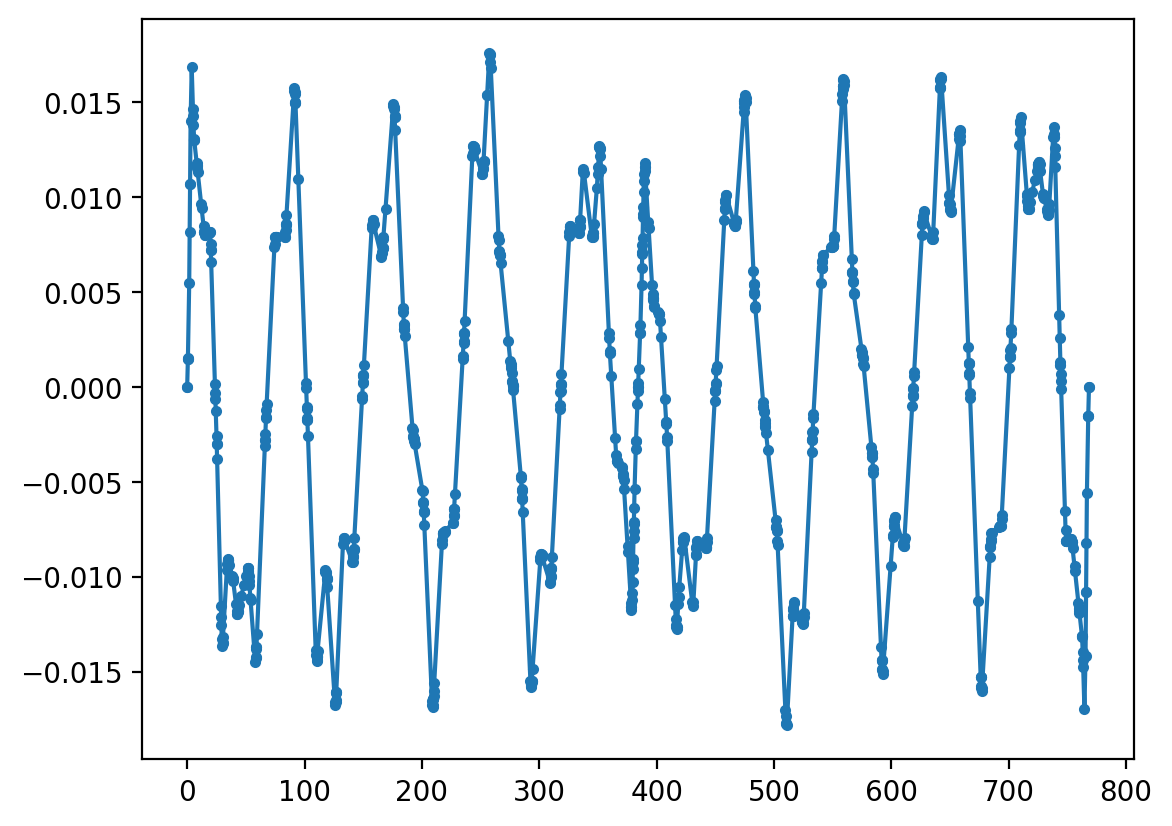

In [16]:
plt.plot(tao.lat_list("*", "ele.s"), tao.lat_list("*", "orbit.vec.1"), marker=".");

Be careful with the flags. The defaults are:

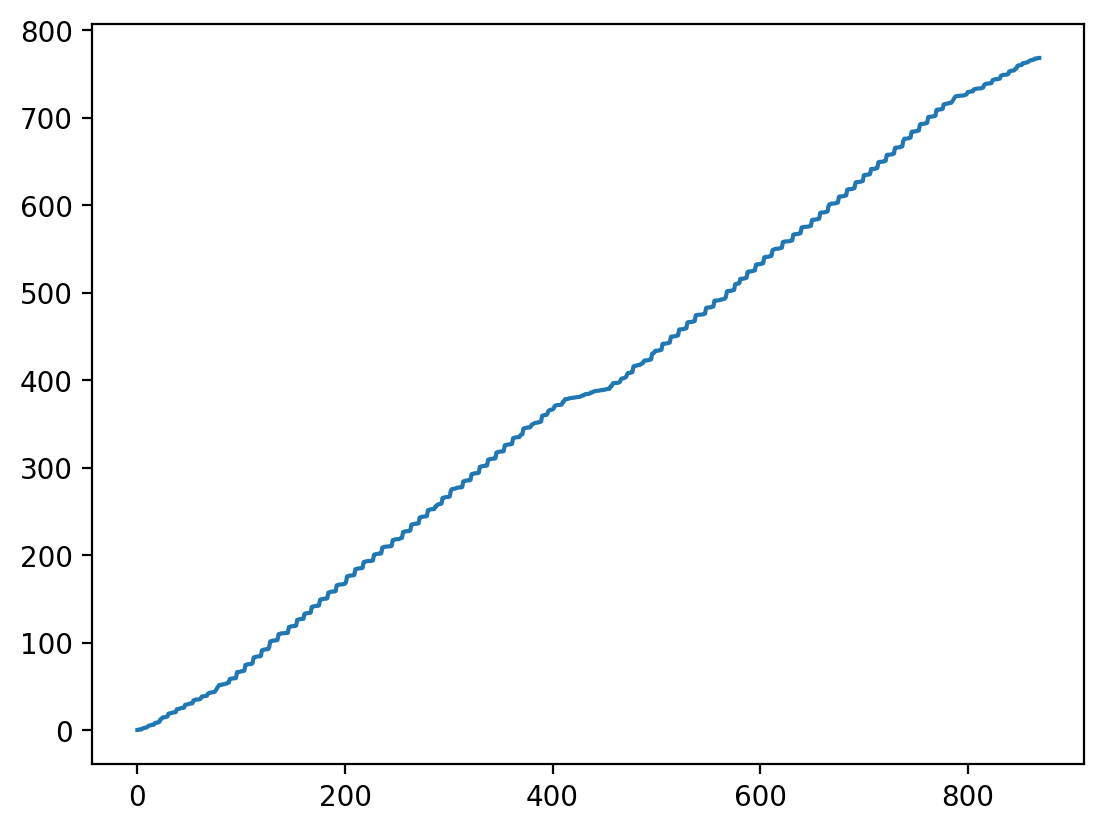

In [17]:
plt.plot(tao.lat_list("*", "ele.s", flags="-array_out -track_only"));

`-index_order` will return

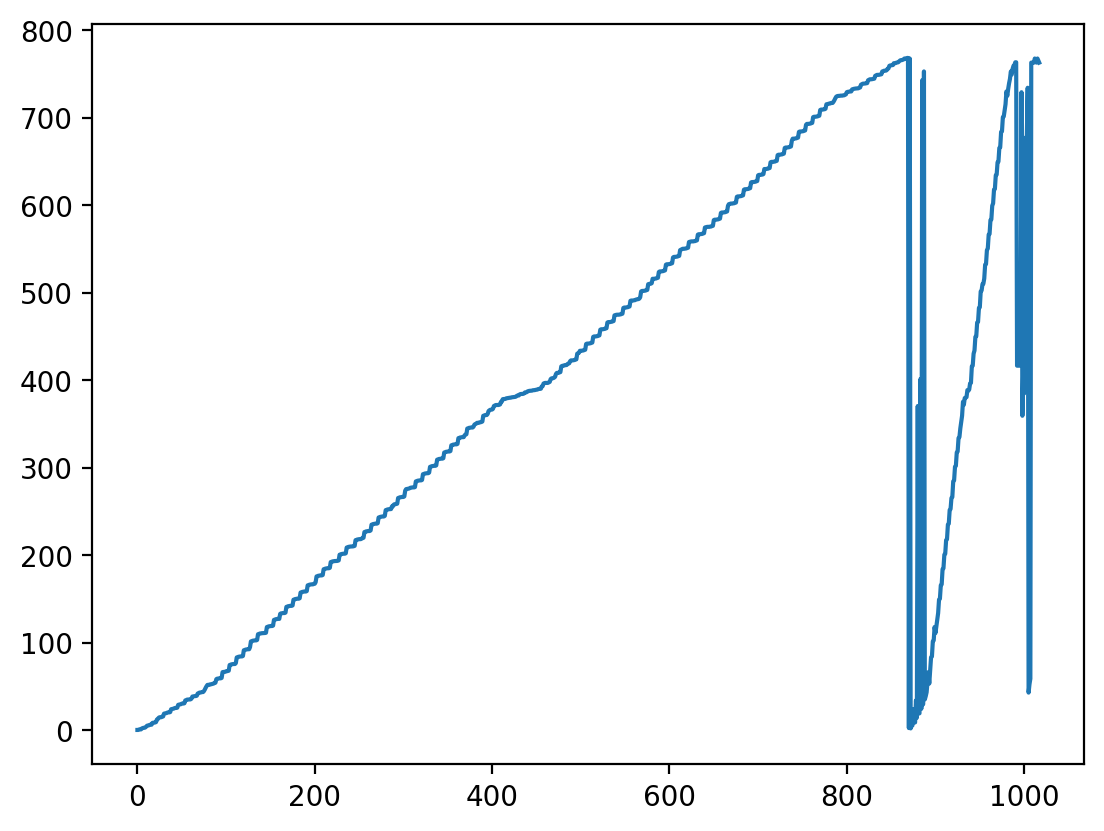

In [18]:
plt.plot(tao.lat_list("*", "ele.s", flags="-array_out -index_order"));

# All method commands

There are many method commands. Please explore the documentation to find the ones that will best suit your needs.

In [19]:
from pytao import interface_commands

all_cmds = [name for name in dir(Tao) if not name.startswith("_")]
for cmd in all_cmds:
    print(cmd)

beam
beam_init
bmad_com
bokeh
branch1
building_wall_graph
building_wall_list
building_wall_point
building_wall_section
bunch1
bunch_comb
bunch_data
bunch_params
cmd
cmd_integer
cmd_real
cmds
constraints
da_aperture
da_params
data
data_d1_array
data_d2
data_d2_array
data_d2_create
data_d2_destroy
data_d_array
data_parameter
data_set_design_value
datum_create
datum_has_ele
derivative
ele_ac_kicker
ele_cartesian_map
ele_chamber_wall
ele_control_var
ele_cylindrical_map
ele_elec_multipoles
ele_floor
ele_gen_attribs
ele_gen_grad_map
ele_grid_field
ele_head
ele_lord_slave
ele_mat6
ele_methods
ele_multipoles
ele_orbit
ele_param
ele_photon
ele_spin_taylor
ele_taylor
ele_twiss
ele_wake
ele_wall3d
em_field
enum
evaluate
floor_orbit
floor_plan
get_output
global_opti_de
global_optimization
help
init
inum
lat_branch_list
lat_calc_done
lat_ele_list
lat_list
lat_param_units
matplotlib
matrix
merit
orbit_at_s
place_buffer
plot
plot1
plot_curve
plot_curve_manage
plot_field
plot_graph
plot_graph_manage
p

There are many commands:

In [20]:
len(all_cmds)

124

Each has documentation and an example associated with it:

In [21]:
tao.data_d2?

# Other Tao instances

Unfortunately there can only be one Tao instance per process, because the internal structures are held in memory and accessed via ctypes. So this will replace the current Tao session in memory.

This looks like a new object:

In [22]:
tao2 = Tao(
    "-init $ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init -noplot"
)

but internally connects to:

In [23]:
tao.lat_list("*", "ele.name")

['BEGINNING',
 'MAR.CSR',
 'FF.PIP00B',
 'FF.BEN01',
 'FF.PIP01',
 'FF.BEN02',
 'FF.PIP02A',
 'MAR.END',
 'END']

## Bunch data

This example has bunch data. There are three methods:

- `tao.bunch_params` to get a dict of statistical data
    
- `tao.bunch1` to get coordinate data arrays
    
- `tao.bunch_data` to get a dict of many coordinate arrays. These can be used to instantiate a ParticleGroup object from the openPMD-beamphysics package.

Statistical data:

In [24]:
stats = tao.bunch_params("end")
stats.keys()

dict_keys(['twiss_beta_x', 'twiss_alpha_x', 'twiss_gamma_x', 'twiss_phi_x', 'twiss_eta_x', 'twiss_etap_x', 'twiss_sigma_x', 'twiss_sigma_p_x', 'twiss_emit_x', 'twiss_norm_emit_x', 'twiss_beta_y', 'twiss_alpha_y', 'twiss_gamma_y', 'twiss_phi_y', 'twiss_eta_y', 'twiss_etap_y', 'twiss_sigma_y', 'twiss_sigma_p_y', 'twiss_emit_y', 'twiss_norm_emit_y', 'twiss_beta_z', 'twiss_alpha_z', 'twiss_gamma_z', 'twiss_phi_z', 'twiss_eta_z', 'twiss_etap_z', 'twiss_sigma_z', 'twiss_sigma_p_z', 'twiss_emit_z', 'twiss_norm_emit_z', 'twiss_beta_a', 'twiss_alpha_a', 'twiss_gamma_a', 'twiss_phi_a', 'twiss_eta_a', 'twiss_etap_a', 'twiss_sigma_a', 'twiss_sigma_p_a', 'twiss_emit_a', 'twiss_norm_emit_a', 'twiss_beta_b', 'twiss_alpha_b', 'twiss_gamma_b', 'twiss_phi_b', 'twiss_eta_b', 'twiss_etap_b', 'twiss_sigma_b', 'twiss_sigma_p_b', 'twiss_emit_b', 'twiss_norm_emit_b', 'twiss_beta_c', 'twiss_alpha_c', 'twiss_gamma_c', 'twiss_phi_c', 'twiss_eta_c', 'twiss_etap_c', 'twiss_sigma_c', 'twiss_sigma_p_c', 'twiss_emit_

Array data:

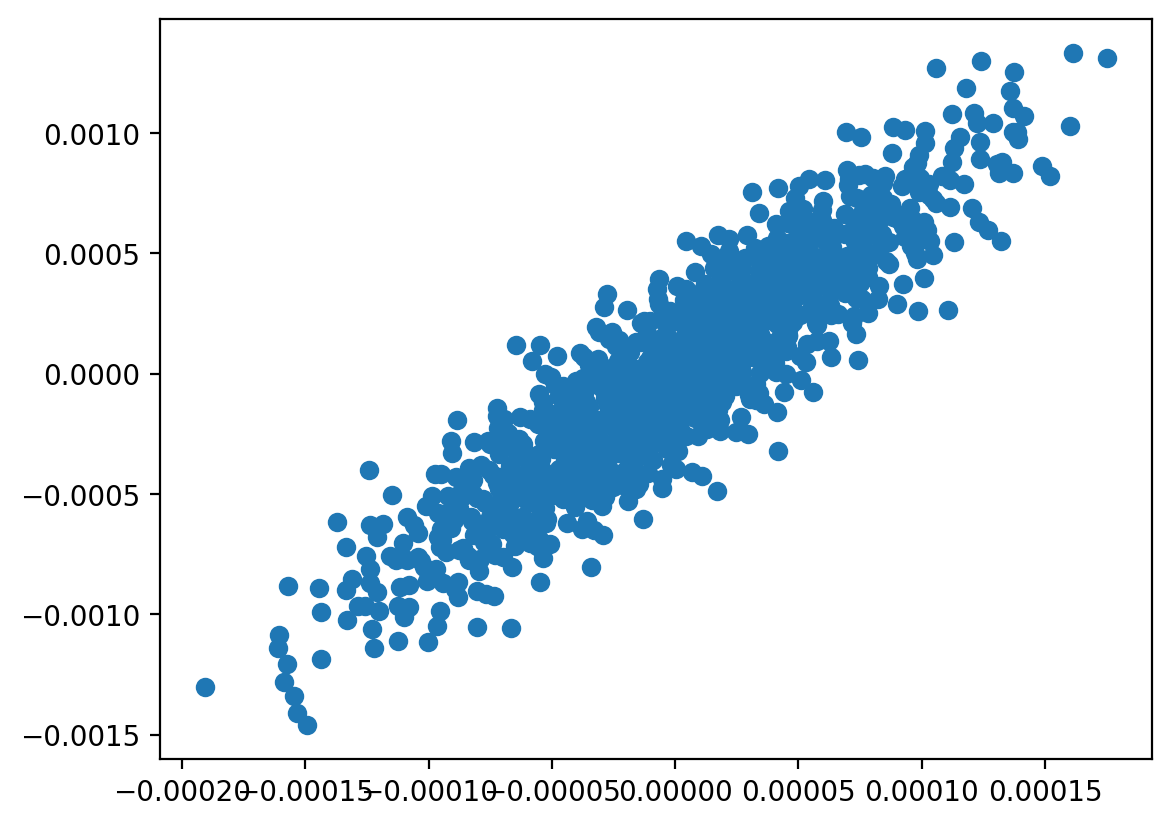

In [25]:
x = tao.bunch1("end", coordinate="x")
px = tao.bunch1("end", coordinate="px")
plt.scatter(x, px);

The state will be returned as an integer array. 

In [26]:
state = tao.bunch1("end", coordinate="state")
state.dtype

dtype('<i4')

# ParticleGroup from openPMD-beamphysics

openPMD-beamphysics is an external package that can be useful for further bunch analysis, plotting, and conversion. 

https://github.com/ChristopherMayes/openPMD-beamphysics

Here is example usage to extract bunch data and instantiate as a `ParticleGroup` object.

*Note that the momentum units in openPMD-beamphysics are in eV/c, whereas Bmad's momenta are normalized by a refrence momentum.*

In [27]:
from pmd_beamphysics import ParticleGroup

This data is suitable for the `ParticleGroup` class

In [28]:
data = tao.bunch_data("end")
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

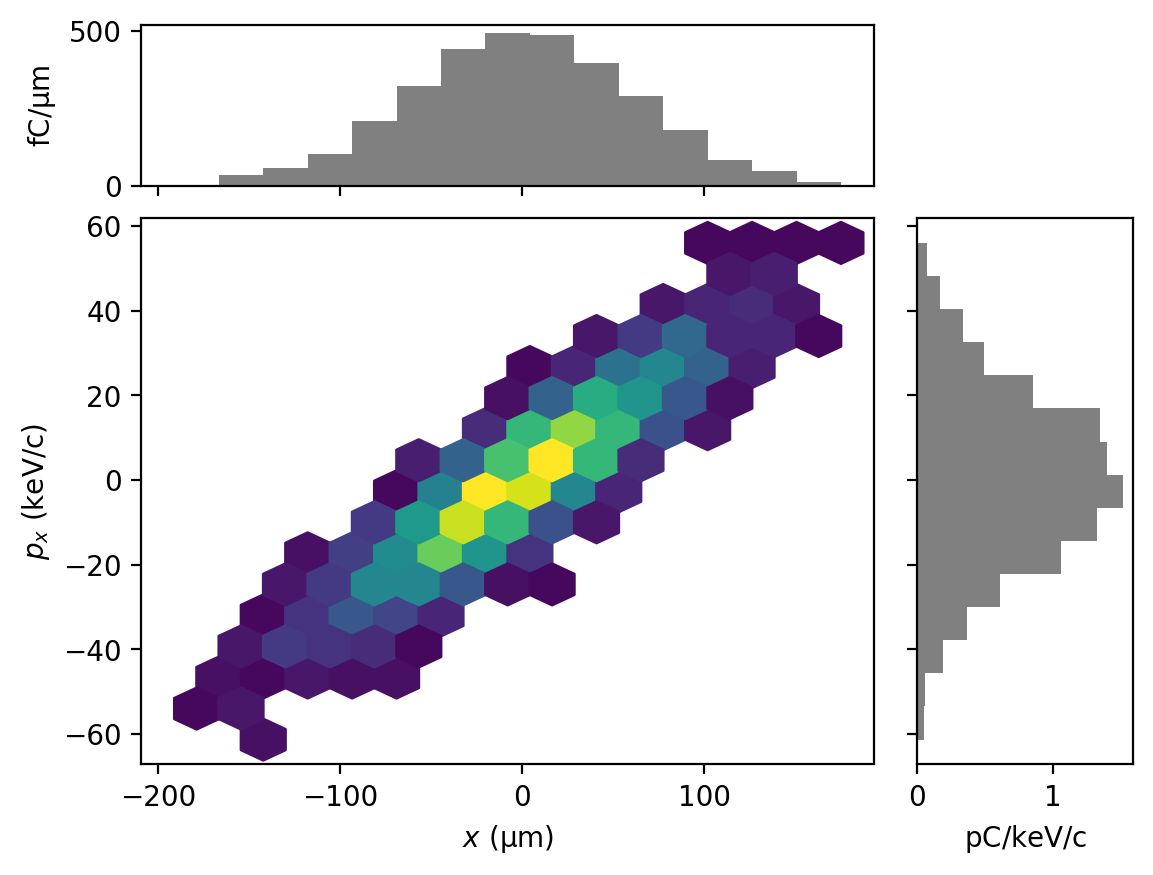

In [29]:
P = ParticleGroup(data=data)

P.plot("x", "px")

Tao's write format is already in the openPMD-beamphysics, so particles can be written and read in this way as well.

In [30]:
tao.cmd("write beam -at end test.h5")

['[INFO] tao_write_cmd:', '    Written: test.h5']

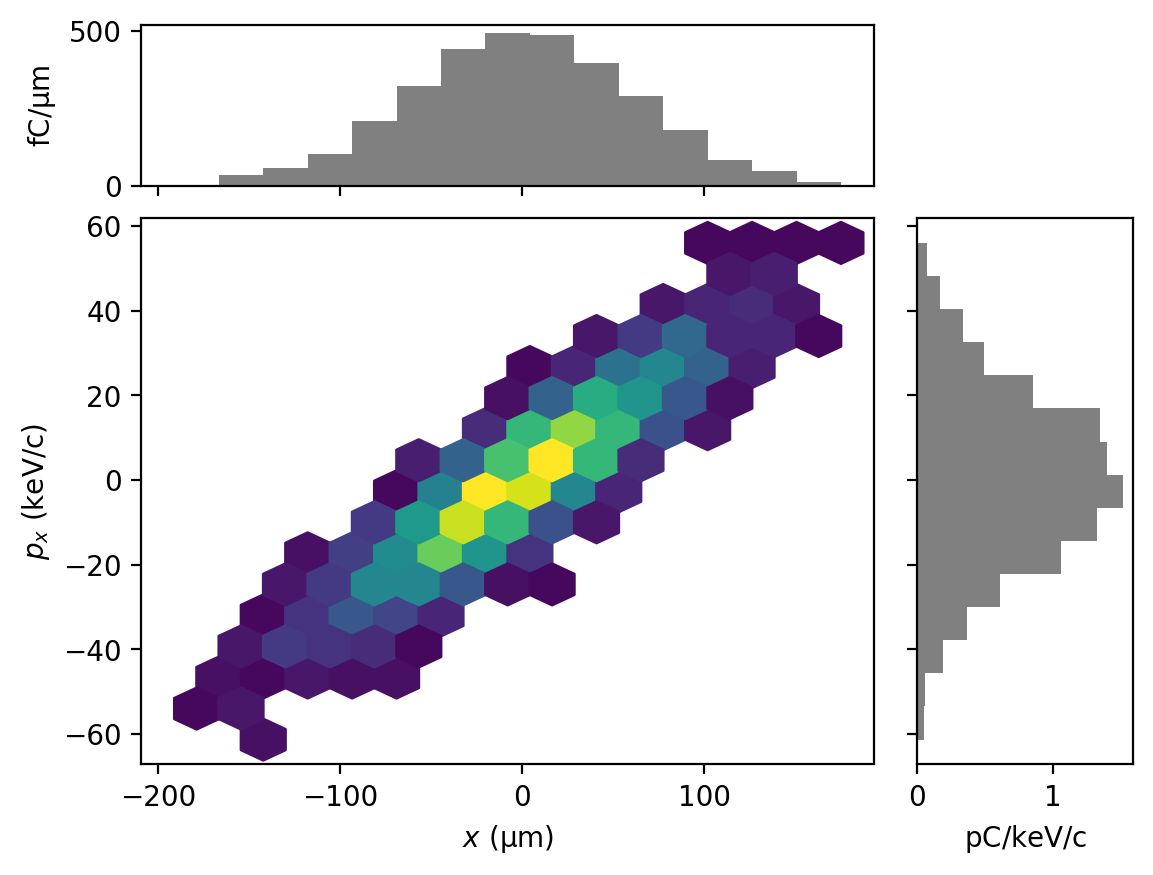

In [31]:
P2 = ParticleGroup("test.h5")
P2.plot("x", "px")

In [32]:
# Cleanup
!rm test.h5

# Error handling and Debugging

All methods have a `raises=True` option. This will raise a RuntimeError if any errors are seen from Tao.


In [33]:
tao.lat_list("*", "ele.s")

array([0.   , 0.   , 0.06 , 0.193, 0.263, 0.385, 0.445, 0.445, 0.445])

In [34]:
try:
    tao.var("foobar")
except Exception as ex:
    print("Exception handled:", ex)

Exception handled: Command: python var foobar  causes error: ERROR detected: [ERROR | 2024-AUG-25 01:15:24] tao_pipe_cmd:
    "pipe var foobar": Not a valid variable name
INVALID


This suppresses the exceptions, returning the error text:

In [35]:
tao.cmd("invalid_command", raises=False)

['[ERROR | 2024-AUG-25 01:15:24] tao_command:',
 '    UNRECOGNIZED COMMAND: invalid_command']

# Logging

All input commands are recorded as debug messages using standard Python logging. 

Enable stdout to see the log messages:

In [36]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

In [37]:
tao.cmd("sho ele 2");

DEBUG:pytao.tao_ctypes.core:Tao> sho ele 2


# Cleanup

In [38]:
!rm csr_wake.dat

rm: cannot remove 'csr_wake.dat': No such file or directory
